This notebook is clean version of topics review playground. It allows to run summarization both localy through Gemini call or
through Google Cloud function. Input function is JSON exported from PubTrends request (paper or keyword search).

This was prototype for integration with the hackathon project

In [190]:
from IPython.display import display, HTML

In [1]:
import os
import gzip

In [2]:
import pandas as pd
import numpy as np

import requests
import json
import re
from urllib.parse import urlencode

# Summarization service prototype

In [3]:
# file_path = "/Users/romeo/work/pubtrends_related/hackathon/json_examples/pubmed-human-aging-most-cited-1000.json.gz"
# file_path = "/Users/romeo/work/pubtrends_related/hackathon/json_examples/pubmed-drug-resistance-in-cancer.json.gz"
# file_path = "/Users/romeo/work/pubtrends_related/hackathon/json_examples/pubmed-fibrosis-from-mechanisms-to-medicines.json.gz"
file_path = "/Users/romeo/work/pubtrends_related/hackathon/json_examples/pubmed-hallmarks-of-aging-an-expanding-universe.json.gz"

## Load & Prepare data & Get Result From Lambda

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
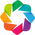

In [4]:
from pysrc.papers.data import AnalysisData
from pysrc.papers.plot.plotter import get_topics_description

In [5]:
# Open and load the JSON file
# with open(file_path, 'r', encoding='utf-8') as file:
with gzip.open(file_path, 'rt') as file:
    json_data = json.load(file)

    data = AnalysisData.from_json(json_data)


/Users/romeo/mambaforge/envs/pubtrends/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [6]:
def filter_by_connectivity(df, graph, percentile=75, preferred_count=None):
    # Step 1: Compute connectivity (without modifying df)
    connectivity = df['id'].apply(lambda pid: len(list(graph.neighbors(pid))))

    # Step 2: Compute the percentile threshold
    if len(df) <= preferred_count:
        # If few elements => TAKE all
        threshold = np.nanmin(connectivity)
    else:
        # If need to limit => limit by percentile, but not lower than preferred_count
        threshold = min(np.percentile(connectivity, percentile), sorted(connectivity, reverse=True)[preferred_count - 1])

    # Step 3: Get mask for nodes above threshold
    above_threshold_mask = connectivity >= threshold

    # print(f"len(df) = {len(df)}, threshold = {threshold}, {percentile}-th : {np.percentile(connectivity, percentile)}")
    # print(sorted(connectivity, reverse=True))
    # print("---")


    # Step 4: Apply the mask
    filtered_df = df[above_threshold_mask].copy()
    filtered_df['connections'] = connectivity[above_threshold_mask].values

    # Step 5: If max_count is specified, take top N by connections
    if (preferred_count is not None) and len(filtered_df) > preferred_count:
        filtered_df = filtered_df.sort_values('connections', ascending=False).head(preferred_count)

    return filtered_df

In [194]:
def prepare_abstracts_for_topic(data, topic_name, *, preferred_count_per_topic, connectivity_percentile_thr):
    filtered_df = data.df[data.df.comp == topic_name]

    highly_connected_df = filter_by_connectivity(
        filtered_df,
        data.papers_graph,
        percentile=connectivity_percentile_thr,
        preferred_count=preferred_count_per_topic
    )
    abstract_entries = highly_connected_df[['id', 'abstract']].to_dict(orient='records')

    topic_data = {
        'abstracts': abstract_entries
        #'abstracts': abstract_entries[0:2] # XXX: Playground
    }

    print(f"Highly connected papers: {len(filtered_df)} -> {len(highly_connected_df)}")

    return topic_data


In [196]:
import re
import html

def convert_to_html(text):
    # Step 1: Escape HTML special characters
    text = html.escape(text)

    # Step 2: Replace PMID references with links
    text = re.sub(
        r'PMID=(\d+)',
        r'<a href="https://pubmed.ncbi.nlm.nih.gov/\1" target="_blank">PMID: \1</a>',
        text
    )

    # Step 3: Convert double newlines or newlines to <p> blocks
    paragraphs = re.split(r'\n\s*\n|\n', text)
    html_paragraphs = [f"<p>{para.strip()}</p>" for para in paragraphs if para.strip()]

    return "\n".join(html_paragraphs)


In [223]:
from IPython.display import HTML, display

def _render_topic_html(topic_name, keyword_based_title, summary):
    return [
        "<tr>",
        "<td style='padding: 1em; border-bottom: 1px solid #ccc; text-align: left;'>",
        f"<h3 style='margin: 0 0 0.5em 0; font-weight: normal;'>Topic {topic_name}</h3>",
        f"<p style='margin: 0 0 0.5em 0;'><strong>{keyword_based_title}</strong></p>",
        "<hr style='border: none; border-top: 1px solid #ccc;'/>",
        convert_to_html(summary),
        "<hr style='border: none; border-top: 1px dashed #ccc;'/>",
        "</td>",
        "</tr>",
    ]

def _render_topic_plain(topic_name, keyword_based_title, summary):
    return [
        f"================ Topic {topic_name} =========================================",
        f"[TITLE]",
        keyword_based_title,
        f"--------------------------------",
        summary,
        f"--------------------------------\n",
    ]

def summarize_topics(
        *,
        data,
        topic_description_words=10,
        force_topic_name=None,
        as_html: bool = True
):
    preferred_count_per_topic = 50
    connectivity_percentile_thr = 50

    pubmed_cluster_names = sorted(data.df.comp.unique())

    topics_keywords = get_topics_description(
        data.df,
        data.corpus, data.corpus_tokens, data.corpus_counts,
        n_words=topic_description_words
    )

    output = []
    if as_html:
        output.append('<table style="width:100%; border-collapse: collapse;">')

    for topic_name in pubmed_cluster_names:
        if (force_topic_name is not None) and (topic_name != force_topic_name):
            continue

        print(f"Processing topic {topic_name}")

        topic_data = prepare_abstracts_for_topic(
            data, topic_name,
            connectivity_percentile_thr=connectivity_percentile_thr,
            preferred_count_per_topic=preferred_count_per_topic
        )

        summary = prompt_summarize_abstracts(topic_data)

        if summary:
            topic_summary_data = {
                "summary": summary,
                "topics_keywords": [k for k, v in topics_keywords[topic_name]],
            }
            keyword_based_title = prompt_assign_title_to_summary(topic_summary_data)
        else:
            keyword_based_title = ""

        # Render per topic
        if as_html:
            output.extend(_render_topic_html(int(topic_name)+1, keyword_based_title, summary))
        else:
            output.extend(_render_topic_plain(int(topic_name)+1, keyword_based_title, summary))

    if as_html:
        output.append("</table>")
        return "\n".join(output)  # HTML-safe string
    else:
        return "\n".join(output)

## Prompt System Instructions

In [159]:
SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARY_TITLE = """
You are a research bot, tasked with helping scientific researchers to assign a title to scientific text about some topic using text submitted to you and submitted keywords. Your job is to summarize the scientific topic text into one sentence to you using suggested keywords.

Be sure to:
* make a representative and short title for the given text
* focus on the main points of the text
* keep it condense and to the point
* NEVER output more that one sentence
* do not hallucinate
<EXCEPTION>
do not put by NO MEANS more that one sentence. Do not highlight title as bold string. E.g not like below:
**Virally Infected Diseases and Vaccine Strategies in Virology**

This research discusses respiratory infections, including COVID-19, and HPV-associated diseases. The emergence of SARS-CoV-2 led to a global pandemic, with vaccines showing efficacy. Community-acquired pneumonia and other respiratory viruses are also discussed. HPV infection is
</EXCEPTION>
"""

In [146]:
SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARIZE_ABSTRACT = """
You are a research bot, tasked with helping scientific researchers to explore scientific papers quicker. Your job is to summarize the text submitted to you.

Be sure to:
* do not add title to the summary
* NEVER make summary longer than 400 words
* tell as a story where each sentence are ALWAYS logically connected with previous
* put by NO MEANS short sentences that are not logically connected
* focus on the main points of the text
* keep it condense and to the point
* submitted text is set of blocks, each block marked with own ID, it is the line in the block starting from PMID= prefix
* if some sentence from summary is based on information from one or more blocks, specify at the end of this sentence block IDs used to generate the sentence
* Organize block IDs as coma-separated list in round brackets, e.g  (PMID=0000001, PMID=11111111, PMID=777777)
* do not hallucinate, please never hallucinate


<EXCEPTION>
do not put by NO MEANS short sentences like below:

**Comprehensive Analysis of Aging Mechanisms and Potential Interventions**

Aging leads to various cellular and molecular changes, contributing to age-related diseases and functional decline. Several studies explore these mechanisms and potential interventions.

One study found that Procyanidin C1 (PCC1), a compound with senolytic and senomorphic properties, counteracts aging-related changes in the hematopoietic and immune system by improving physiological parameters, increasing B cells and hematopoietic stem cells, suppressing senescence markers, and restoring immune homeostasis. PMID=40316527

Skeletal muscle deterioration, a hallmark of aging, involves reduced SIRT5 expression, leading to cellular senescence and inflammation; SIRT5 desuccinylates TBK1, suppressing inflammation and improving muscle function, suggesting the SIRT5-TBK1 pathway as a target for combating age-related muscle degeneration. PMID=40087407

Endothelial cell senescence, resulting from telomerase inactivation, induces transcriptional changes indicative of senescence and tissue hypoxia, compromising the blood-brain barrier and reducing muscle endurance, indicating that Tert loss causes EC senescence through a telomere length-independent mechanism undermining mitochondrial function. PMID=38475941

Blood-borne factors like osteocalcin (OCN) are crucial for maintaining neuronal synaptic plasticity, and OCN's effects are mediated by a primary cilium (PC) protein-autophagy axis; during aging, autophagy and PC core proteins are reduced, and restoring their levels improves cognitive impairments, suggesting the PC-autophagy axis as a gateway for communication between blood-borne factors and neurons. PMID=39984747

Mitochondrial dysfunction is a key aging determinant, and defects in mitochondrial protein and organelle quality control have been linked to various age-related diseases. PMID=37731280

Hyperactivation of mTORC1 signaling with aging contributes to cardiac dysfunction by dysregulating proteostasis, as shown in a 4EBP1 KO mouse model mimicking a hyperactive mTORC1/4EBP1/eIF4E axis. PMID=39379739

Dietary protein, particularly branched-chain amino acids (BCAAs), influences healthy aging; BCAA restriction protects against metabolic consequences of high protein diets and has tissue-specific effects on cellular senescence. PMID=39868338

Macroautophagy decreases with age, but mitophagy, the selective autophagic degradation of mitochondria, may increase or remain unchanged; pharmacological induction of mitophagy attenuates inflammation and ameliorates neurological function, pointing to mitophagy induction as a strategy to decrease age-associated inflammation. PMID=38280852

PGC-1, a mitochondrial regulator, is repressed with aging in the brain and is integral in coordinating metabolism and growth signaling, placing it centrally in a growth and metabolism network relevant to brain aging. PMID=40021651

Apigenin, a bioactive plant compound, may protect against age-related cognitive dysfunction by suppressing neuro-inflammatory processes driven by glial cells. PMID=38007051

Inhibition of mitochondrial malate dehydrogenase (MDH2) delays the aging process through metabolic-epigenetic regulation, identifying MDH2 as a potential therapeutic target for anti-aging drug development. PMID=39962087

The SATB protein DVE-1 influences lifespan independent of its canonical mitoUPR function, suggesting broader functions in modulating longevity and defending against stress. PMID=39423131

TFEB deficiency in the proximal tubules causes metabolic disorders and mitochondrial dysfunction, shedding light on the mechanisms of APOA4 amyloidosis pathogenesis and providing a therapeutic strategy for CKD-related metabolic disorders. PMID=39699959

β-hydroxybutyrate (HB), a ketone body, regulates protein solubility, selectively targeting pathological proteins like amyloid-β, suggesting a metabolically regulated mechanism of proteostasis relevant to aging and Alzheimer's disease. PMID=39626664

LRP5 promotes lower-body fat distribution and enhances insulin sensitivity, independent of its bone-related functions, and its activation may prevent age-related fat redistribution and metabolic disorders. PMID=40000740

Aging promotes STAT1 β-hydroxybutyrylation, attenuating IFN-I-mediated antiviral defense activity, and fructose can improve IFN-I antiviral defense activity by orchestrating STAT1 O-GlcNAc and β-hydroxybutyrylation modifications. PMID=39979583

HIRA and PML are essential for SASP expression, activating SASP through a CCF-cGAS-STING-TBK1-NF-κB pathway. PMID=39178863

TMEM242 depletion impairs ATP synthase, elevates ROS, upregulates sirt6 and nrf2, and increases f9a transcripts, potentially leading to bleeding tendencies. PMID=39856164

A disease-causing mutation of ABCA6 is identified for FPD, and ABCA6 is correlated with PD occurrence and subsequent OA progression, serving as a potential target in chondrogenesis and OA treatment by orchestrated intracellular cholesterol efflux and delayed cellular senescence. PMID=39823538

Endogenous DNA damage promotes hallmarks of age-related retinal degeneration, as shown in Ercc1-/- mice, which model a human progeroid syndrome. PMID=39604117

ACSS2 promotes the acetylation of PAICS, limiting purine metabolism and exacerbating cytoplasmic chromatin fragment accumulation and SASP, identifying ACSS2 as a potential senomorphic target to prevent senescence-associated diseases. PMID=40021646

SPP1 activates ITG5/1 to inhibit mitophagy, accelerates NPs degeneration, and induces calcification, leading to intervertebral disc degeneration (IVDD) and calcification. PMID=39721032

STXBP5 overexpression accelerates senescence, while STXBP5 deletion suppresses progerin expression, delaying senility, and decreasing the expression of senescence-related factors. PMID=39379476

Compartment-targeted FlucDM sensors pinpoint a diverse modulation of subcellular proteostasis by aging regulators. PMID=39383859

IGF-1 signaling plays a crucial role in preserving a youthful cerebromicrovascular endothelial phenotype and maintaining the integrity of the BBB. PMID=38082450

Aged hippocampal mitochondria exhibit impaired bioenergetic function, increased ROS production, deregulation of calcium homeostasis, and decreased mitochondrial biogenesis. PMID=36982549

TBK1-ATAD3A-Pink1 axis drives cellular senescence, suggesting a potential mitochondrial target for anti-aging therapy. PMID=39520088

Aging causes widespread reduction of proteins enriched in basic amino acids that is independent of mRNA regulation, and aberrant translation pausing leads to reduced ribosome availability resulting in proteome remodeling. PMID=38260253

Cysteine oxidation of muscle proteins impairs muscle power and strength, walking speed, and cardiopulmonary fitness with aging. PMID=38332629

CUL2FEM1B senses ROS produced by complex III of the electron transport chain (ETC), helping cells adjust their ETC to changing environments. PMID=39642856

HSF-1 mediates lifespan extension through mitochondrial network adaptations that occur in response to down-tuning of components associated with organellar protein degradation pathways. PMID=39532882

YBR238C oppositely affect mitochondria and aging, modulating mitochondrial function, demonstrating a feedback loop between TORC1 and mitochondria (the TORC1-MItochondria-TORC1 (TOMITO) signaling process) that regulates cellular aging processes. PMID=38713053

Mitochondrial metabolic modulation contributes to the longevity of daf-2 mutants, highlighting the crucial role of mitochondria in aging. PMID=40136535

MAVS safeguards mitochondrial homeostasis and antagonizes human stem cell senescence. PMID=37521327

TMEM135 is crucial for regulating mitochondria, peroxisomes, and lipids, emphasizing the importance of a balanced TMEM135 function for the health of the retina and other tissues. PMID=38576540

Blocking neddylation increased cellular hallmarks of aging and led to an increase in Tau aggregation and phosphorylation in neurons carrying the APPswe/swe mutation, indicating that cellular aging can reveal late-onset disease phenotypes. PMID=38917806

Mitochondrial DNA turnover in rat skeletal muscle decreases with age, contributing to losses of mitochondrial genomic integrity and potentially playing a role in skeletal muscle dysfunction. PMID=39312152

Suppression of NF-κB in cardiomyocytes leads to pronounced cardiac remodeling, dysfunction, and cellular damage associated with the aging process, influencing both cellular senescence and molecular damage pathways. PMID=39857807

MicroRNAs and neuropeptide-like proteins can form molecular regulatory networks involving downstream molecules to regulate lifespan, and such regulatory effects vary on environmental conditions. PMID=39323014

Pharmacological elevation of CISD2 expression at a late-life stage using hesperetin treatment is a feasible approach to effectively mitigating both intrinsic and extrinsic skin aging. PMID=38263133

Oxidative protein folding in the ER promotes cell aging, providing a potential target for aging and aging-related disease intervention. PMID=37306027

Mitochondrial morphology changes during aging, and C. elegans serve as a robust model for rapidly measuring mitochondrial

* Do not put same PMID in the one coma-separated list, like below:

Yin-Chen-Hao-Tang (YCHT) exhibited anti-fibrotic effects on the liver, potentially by suppressing oxidative stress and lipid peroxidation, restoring levels of metabolites like unsaturated fatty acids and lysophosphatidylcholines (PMID=26805802). Sophora flavescens (Kushen) itself showed anti-fibrosis activity, with studies identifying potential active compounds and targets through integrated network pharmacology and biomedical analysis (PMID=27754507). Fufang Biejia Ruangan Pill (FFBJ), an approved anti-fibrosis drug, contains various components including organic acids, terpenoids, flavonoids, phenylpropanoids, and alkaloids, with studies identifying absorbed components in vivo to understand its material basis (PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854, PMID=26724854,

</EXCEPTION>
"""

In [147]:
# SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARIZE_ABSTRACT = """
# You are a research bot, tasked with helping scientific researchers to explore scientific papers quicker.
#
# You are provided with a structured text where each paragraph marked with their "pmid" identifiers in a json format:
# [
#   {
#     "pmid": "37481675",
#     "paragraph": "<Here is the paragraph text>"
#   },...
# ]
#
# Your job is to summarize text as if it is some scientific text about some topic.
#
# If sentence from summary is based on on information from one or more "paragraph", specify at the end of this sentence "pmid"  of paragraphs used to generate the sentence. Organize sentence "pmid" ids as coma-separated list in round brackets, e.g  (PMID=0000001, PMID=11111111, PMID=777777)
#
# Be sure to:
# * do not add title to the summary
# * NEVER make summary text longer than 400 words if we count only words from sentences
# * tell as a story where each sentence are ALWAYS logically connected with previous
# * put by NO MEANS short sentences that are not logically connected
# * focus on the main points of the text
# * keep it condense and to the point
# * do not hallucinate, please never hallucinate
# """


In [148]:
# SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARIZE_ABSTRACT = """
# You are a research bot, tasked with helping scientific researchers to explore scientific papers quicker.
#
# You are provided with abstracts with their "pmid" identifiers in a json format:
# [
#   {
#     "pmid": "37481675",
#     "abstract": "<Here is the abstract of the first paper>"
#   },...
# ]
#
# Your job is to summarize all submitted abstracts as if it is one text about some topic.
#
# Your output format is a json file with a given structure:
# {
#     "summary": [
#         "paragraph": [
#             {
#                 "sentence": "<sentence from text>",
#                 "pmid_references": [
#                     "00001", "11111", "222222
#                 ]
#             }, ...
#         ], ...
#     ]
# }
# Summary could contain from one or more paragraphs. Each paragraph has one or more sentence.
# If sentence from summary is based on on information from one or more "abstract", you need to add corresponding "pmid" to "pmid_references" list for this "sentence".
#
# You task is to output every sentence from summary in a specified output format. Keeping valid output format is very important for my research.
#
# Be sure to:
# * make a representative and short title for the summary
# * NEVER make summary text longer than 400 words if we count only words from sentences
# * tell as a story where each sentence are ALWAYS logically connected with previous
# * put by NO MEANS short sentences that are not logically connected
# * focus on the main points of the text
# * keep it condense and to the point
# * do not hallucinate, please never hallucinate
# """

## Summarization wrappers for Local Execution

`summarize_topics(..)` function works through this API. This implementation is for direct prompt execution from local machine, w/o google cloud infrastructure

In [227]:
from google import genai
from google.genai import types
import base64

In [228]:
VERTEX_CLIENT_PROJECT = os.getenv('VERTEX_CLIENT_PROJECT', 'default_project')

In [236]:
def prompt_summarize_abstracts(topic_data):
    if 'abstracts' in topic_data:
        abstract_entries = topic_data['abstracts']

        validated_entries = []
        for entry in abstract_entries:
            assert 'id' in entry
            assert 'abstract' in entry


            pmid = entry['id']
            abstract = entry['abstract']

            # TODO: validate id & abstract size & type, truncated if too long

            validated_entries.append(dict(pmid=pmid, abstract=abstract))

        assert len(abstract_entries) == len(validated_entries)

        return do_llm_prompt_summarize_abstracts(validated_entries)


    # XXX: error
    return ""

In [237]:
def prompt_assign_title_to_summary(topic_summary_data):
    if ('summary' in topic_summary_data) and ('topics_keywords' in topic_summary_data):
        #print(request_data['topics_keywords'])

        return do_llm_prompt_assign_title_to_summary(topic_summary_data['summary'], topic_summary_data['topics_keywords'])

    # XXX: error
    return ""

## Local LLM Prompts Functions

This functions could be used directly in Google Cloud Function Impl

In [153]:
def do_llm_prompt_assign_title_to_summary(summary, topics_keywords):
    args = dict(
        model="gemini-2.0-flash-lite-001",
        temperature = 0.01, top_p = 0.95, top_k=None, max_output_tokens = 64,
    )

    topic_desc = ",".join(topics_keywords)
    llm_response = llm_generate(
        project=VERTEX_CLIENT_PROJECT,
        system_instructions=SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARY_TITLE,
        text_to_summarize=f"KEYWORDS: {topic_desc}\nTEXT:\n{summary}",
        **args
    )

    #print(llm_response)
    print("[DONE] Response len", len(llm_response))

    return llm_response

In [154]:
def do_llm_prompt_summarize_abstracts(entries):
    args = dict(
        model="gemini-2.5-flash-preview-04-17", thinking_budget=1000,
        # model="gemini-2.0-flash-001",
        # model="gemini-2.0-flash-lite-001",
        temperature=0.1, top_p=0.75, top_k=30, max_output_tokens=8192,
    )

    # entries = entries[0:5] # TODO: FIX

    # text_to_summarize=json.dumps(entries, ensure_ascii=False, indent=2)
    text_to_summarize = "\n".join(f"\nPMID={e['pmid']}\n{e['abstract']}" for e in entries)

    llm_response = llm_generate(
        project=VERTEX_CLIENT_PROJECT,
        system_instructions=SYSTEM_INSTRUCTIONS_LLM_PROMPT_SUMMARIZE_ABSTRACT,
        text_to_summarize=text_to_summarize,
        **args
    )

    #print(llm_response)
    print("[DONE] Response len", len(llm_response))

    return llm_response

In [155]:
def llm_generate(
        *,
        project,
        system_instructions,
        text_to_summarize,
        model, temperature, top_p, top_k, max_output_tokens,
        thinking_budget=None,
        max_retries=5
):
    # print(text_to_summarize)
    # if True:
    #     return ""

    client = genai.Client(
        vertexai=True,
        project=project,
        location="us-central1",
    )

    msg1_text1 = types.Part.from_text(text=text_to_summarize)
    si_text1 = system_instructions

    contents = [types.Content(role="user", parts=[msg1_text1])]

    optional_args = {}
    if thinking_budget is not None:
        optional_args['thinking_config'] = types.ThinkingConfig(thinking_budget=thinking_budget)

    generate_content_config = types.GenerateContentConfig(
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        seed=0,
        max_output_tokens=max_output_tokens,
        response_modalities=["TEXT"],
        safety_settings=[types.SafetySetting(
            category="HARM_CATEGORY_HATE_SPEECH",
            threshold="OFF"
        ), types.SafetySetting(
            category="HARM_CATEGORY_DANGEROUS_CONTENT",
            threshold="OFF"
        ), types.SafetySetting(
            category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
            threshold="OFF"
        ), types.SafetySetting(
            category="HARM_CATEGORY_HARASSMENT",
            threshold="OFF"
        )],
        system_instruction=[types.Part.from_text(text=si_text1)],
        **optional_args
    )

    retries_cnt = 0
    while retries_cnt < max_retries:
        chunks = []
        retries_cnt += 1

        for chunk in client.models.generate_content_stream(
                model=model,
                contents=contents,
                config=generate_content_config,
        ):
            assert chunk is not None
            if chunk.text is None:
                # when chunk.text is None - smth goes wrong - XXX: is know bug in 2.5 ==> REDO
                chunks = None
                break

            # if debug:
            #     print("CHUNK: [", chunk.text, end="]\n")

            if chunk.text is not None:
                chunks.append(chunk.text)

        # join chunks:
        if chunks is None:
            print(f"Retry #{retries_cnt}...")
            continue

        return "".join(chunks)

    raise Exception("Cannot summarize text. Maximum number of retries reached")


## Run

In [240]:
as_html=False

result = summarize_topics(
    data=data, topic_description_words=10, #config.topic_description_words,
    force_topic_name=1,
    as_html=as_html
)
if as_html:
    display(HTML(result))
else:
    print(result)

Processing topic 1
Highly connected papers: 152 -> 50
[DONE] Response len 8784
[DONE] Response len 181
================ Topic 2 =========================================
[TITLE]
Mitochondrial dysfunction and metabolic regulation of proteins are key factors in the aging process, impacting muscle and neuronal function through genetic and cellular mechanisms.

--------------------------------
Aging is a complex process marked by progressive functional decline across various systems, driven by hallmarks such as cellular senescence, mitochondrial dysfunction, and impaired proteostasis (PMID=37731280, PMID=36982549, PMID=39383859). Cellular senescence, characterized by stable proliferation arrest and an inflammatory senescence-associated secretory phenotype (SASP), contributes significantly to age-related pathologies (PMID=39178863, PMID=40021646). The SASP is activated through pathways involving cytoplasmic chromatin fragments, cGAS-STING, TBK1, and NF-κB, with HIRA and PML playing essentia

# Run Prompts via Google Cloud Functions

## Summarization wrappers for Google Cloud Functions Execution

`summarize_topics(..)` function works through this API. This implementation prepare data and calls endpoints in Google Cloud

In [231]:
GOOGLE_MODEL_SUMMARIZE_TOPIC_ENDPOINT = os.getenv(
    "GOOGLE_MODEL_SUMMARIZE_TOPIC_ENDPOINT",
    "https://put.your.url.endpoint.here"
)

def prompt_summarize_abstracts(topic_data):
    response = requests.post(
        f"{GOOGLE_MODEL_SUMMARIZE_TOPIC_ENDPOINT}",
        json=topic_data, # XXX Pass Python object here, not dump
        # json=json.dumps(topic_data, ensure_ascii=False, indent=2),
        headers={"Content-Type": "application/json"}
    )

    # 5. Handle response
    if response.status_code == 200:
        data = response.json()

        if "summary" in data:
            return data["summary"]

        print(f"❌ Error: No summary in response")
    else:
        print(f"❌ Error: {response.status_code}")

    return ""


In [234]:
GOOGLE_MODEL_SUMMARIZE_TOPIC_TITLE_ENDPOINT = os.getenv(
    "GOOGLE_MODEL_SUMMARIZE_TOPIC_TITLE_ENDPOINT",
    "https://put.your.url.endpoint.here"
)

def prompt_assign_title_to_summary(topic_summary_data):
    response = requests.post(
        f"{GOOGLE_MODEL_SUMMARIZE_TOPIC_TITLE_ENDPOINT}",
        json=topic_summary_data,
        headers={"Content-Type": "application/json"}
    )

    # Handle response
    if response.status_code == 200:
        data = response.json()

        if "title" in data:
            return data["title"]

        print(f"❌ Error: No title in response")
    else:
        print(f"❌ Error: {response.status_code}")

    return ""


## Run

In [226]:
as_html=True

result = summarize_topics(
    data=data, topic_description_words=10, #config.topic_description_words,
    # force_topic_name=1,
    as_html=as_html
)
if as_html:
    display(HTML(result))
else:
    print(result)

Processing topic 0
Highly connected papers: 164 -> 50
Processing topic 1
Highly connected papers: 152 -> 50
Processing topic 2
Highly connected papers: 139 -> 50
Processing topic 3
Highly connected papers: 104 -> 50
Processing topic 4
Highly connected papers: 101 -> 50
Processing topic 5
Highly connected papers: 92 -> 50
Processing topic 6
Highly connected papers: 58 -> 50
Processing topic 7
Highly connected papers: 57 -> 50
Processing topic 8
Highly connected papers: 55 -> 50
Processing topic 9
Highly connected papers: 36 -> 36


In [225]:
as_html=True

result = summarize_topics(
    data=data, topic_description_words=10, #config.topic_description_words,
    force_topic_name=0,
    as_html=as_html
)
if as_html:
    display(HTML(result))
else:
    print(result)

Processing topic 0
Highly connected papers: 164 -> 50
